In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [2]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.3 MB/s 
     |████████████████████████████████| 3.4 MB 36.2 MB/s 
     |████████████████████████████████| 6.8 MB 27.7 MB/s 
     |████████████████████████████████| 1.2 MB 39.9 MB/s 
     |████████████████████████████████| 61 kB 378 kB/s 
     |████████████████████████████████| 3.3 MB 37.8 MB/s 
     |████████████████████████████████| 895 kB 41.7 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=d365e20139e73a81f4dd7d2aa990bdc94d8c80ab3f70697a7e8db7eeb3c6ae37
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/investing/investing_submissions_all.csv", sep=";")
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2017-12-29 22:35:34,127763,SolarSurfer7,2017-12-29 22:35:34,7mxl2u,NaN,19,2,0,With all of the Canadian pot stocks going para...,Canadian Pot Market Cap Napkin Calcs,0.0
2017-12-29 21:14:45,127764,koolkavi2,2017-12-29 21:14:45,7mx3f1,NaN,0,1,0,I am relatively new to investing and have been...,What are US-domiciled funds?,0.0
2017-12-29 20:17:47,127765,Bcrane0305,2017-12-29 20:17:47,7mwqss,NaN,5,3,0,What would his job title be if it really exist...,Gordon Gekko-Wall street,0.0
2017-12-29 19:00:35,127766,runawaytrainmaster,2017-12-29 19:00:35,7mw93s,NaN,7,2,0,i have a unique situation with my home equity ...,dump savings into home equity before selling?,0.0
2017-12-29 18:43:47,127767,IndexMyAss,2017-12-29 18:43:47,7mw58w,NaN,4,16,0,My account shows that it takes 2 days for cash...,Why do options take only 1 day to settle where...,0.0


In [6]:
df=df.rename(columns={"Unnamed: 0": "SegmentID"})

In [7]:
df.head()

,SegmentID,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2021-11-26 15:17:50,0,plszvlko,2021-11-26 15:17:50,r2po7v,NaN,1,1,1955286,[removed],What do you use to invest?,1.0
2021-11-26 14:43:13,1,eopif,2021-11-26 14:43:13,r2oynm,NaN,1,1,1955263,[removed],Where does flow data providers get their data ...,1.0
2021-11-26 14:11:28,2,VonDerBerg,2021-11-26 14:11:28,r2ob2e,NaN,1,1,1955253,So the markets are tanking on new variant news...,$NVAX new variant. Approvals. Lift-off.,1.0
2021-11-26 14:11:07,3,AccountForFinance,2021-11-26 14:11:07,r2oaua,NaN,1,1,1955253,[removed],Need Advice re % Allocation to Stocks and ROTH...,1.0
2021-11-26 13:56:37,4,ascends-me,2021-11-26 13:56:37,r2o0ww,NaN,1,1,1955247,[removed],how do you seek crypto guidance?,1.0


In [8]:
#Sentences are encoded by calling model.encode() #https://www.sbert.net/
import re
df_title = df["title"].apply(lambda title: re.sub(r"http\S+", "", title).lower(), 1)
#df_title[5000]
embeddings = model.encode(df_title.tolist())

In [9]:
import pickle
#Store sentences & embeddings on disc
#with open('/content/drive/MyDrive/stocks/embeddings.pkl', "wb") as fOut:
#    pickle.dump({'sentences': df_title.tolist(), 'embeddings': embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
#with open('/content/drive/MyDrive/stocks/embeddings.pkl', "rb") as fIn:
#    stored_data = pickle.load(fIn)
#    stored_sentences = stored_data['sentences']
#    stored_embeddings = stored_data['embeddings']

In [10]:
"""
This is a more complex example on performing clustering on large scale dataset.
This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.
A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.
The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding comuptation).

"""
from sentence_transformers import SentenceTransformer, util
import os
import csv
import time

titles = df_title.tolist()[0:50000]

print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(embeddings[0:50000], min_community_size=200, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])


Start clustering
Clustering done after 64.28 sec

Cluster 1, #705 Elements 
	 new to investing. would like some advice.
	 new to investing. need advice
	 new to investing, would appreciate some advice.
	 ...
	 want to start investing my money.
	 extra money to invest with?
	 new to investing been saving a few bucks that i wouldn’t need to spend and wondering what to do with it

Cluster 2, #457 Elements 
	 crypto currency investing
	 crypto investing
	 question about crypto investing
	 ...
	 my crypto trading journey since btc 60k peak
	 is crypto keeping inflation at bay?
	 who is buying all the crypto? why 2 trillion market cap?

Cluster 3, #412 Elements 
	 roth ira
	 roth ira
	 roth ira
	 ...
	 put your young money into a roth.
	 ira contribution towards previous year after filing tax
	 should i cash out 401k and pay fee to put in roth?

Cluster 4, #286 Elements 
	 daily advice thread - all basic help or advice questions must be posted here. november 26, 2021
	 daily advice thread - 

In [11]:
print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(embeddings[0:50000], min_community_size=150, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])

Start clustering
Clustering done after 47.29 sec

Cluster 1, #705 Elements 
	 new to investing. would like some advice.
	 new to investing. need advice
	 new to investing, would appreciate some advice.
	 ...
	 want to start investing my money.
	 extra money to invest with?
	 new to investing been saving a few bucks that i wouldn’t need to spend and wondering what to do with it

Cluster 2, #457 Elements 
	 crypto currency investing
	 crypto investing
	 question about crypto investing
	 ...
	 my crypto trading journey since btc 60k peak
	 is crypto keeping inflation at bay?
	 who is buying all the crypto? why 2 trillion market cap?

Cluster 3, #412 Elements 
	 roth ira
	 roth ira
	 roth ira
	 ...
	 put your young money into a roth.
	 ira contribution towards previous year after filing tax
	 should i cash out 401k and pay fee to put in roth?

Cluster 4, #286 Elements 
	 daily advice thread - all basic help or advice questions must be posted here. november 26, 2021
	 daily advice thread - 

In [12]:
print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(embeddings[0:50000], min_community_size=100, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])

Start clustering
Clustering done after 46.44 sec

Cluster 1, #705 Elements 
	 new to investing. would like some advice.
	 new to investing. need advice
	 new to investing, would appreciate some advice.
	 ...
	 want to start investing my money.
	 extra money to invest with?
	 new to investing been saving a few bucks that i wouldn’t need to spend and wondering what to do with it

Cluster 2, #457 Elements 
	 crypto currency investing
	 crypto investing
	 question about crypto investing
	 ...
	 my crypto trading journey since btc 60k peak
	 is crypto keeping inflation at bay?
	 who is buying all the crypto? why 2 trillion market cap?

Cluster 3, #412 Elements 
	 roth ira
	 roth ira
	 roth ira
	 ...
	 put your young money into a roth.
	 ira contribution towards previous year after filing tax
	 should i cash out 401k and pay fee to put in roth?

Cluster 4, #286 Elements 
	 daily advice thread - all basic help or advice questions must be posted here. november 26, 2021
	 daily advice thread - 

In [13]:
titles[50]

'gold is bad investment if i’m gonna hold 30+ years'

In [14]:
author_list =df[df['SegmentID'] < 500]['author'][:][0:500].tolist()

In [15]:
embeddings[50]

array([ 2.43476912e-01,  1.40019104e-01,  2.09240347e-01,  5.91895163e-01,
       -6.03142753e-02, -3.54817472e-02, -1.31473452e-01,  9.65013504e-02,
       -2.02863693e-01, -6.49289563e-02, -1.76155895e-01,  3.15284759e-01,
       -3.50275040e-01, -2.56364852e-01,  1.26806065e-01, -1.12410545e-01,
       -1.45779535e-01, -3.40170860e-01, -1.64003983e-01,  4.26074088e-01,
       -1.81041569e-01, -4.83920366e-01,  2.26374924e-01,  1.99801624e-01,
        3.05548966e-01,  3.36955756e-01,  1.46985024e-01,  2.11602837e-01,
       -7.16076344e-02,  3.71485084e-01,  2.10023560e-02, -7.43739381e-02,
        2.23489553e-01,  2.68484324e-01,  6.38076246e-01, -2.01054346e-02,
        7.37444013e-02,  4.37485665e-01,  1.54808462e-01, -3.87886941e-01,
        1.74948961e-01,  4.82797474e-02,  3.07805151e-01,  1.46001995e-01,
        5.95119558e-02,  1.84749886e-01,  6.43625140e-01, -4.21765924e-01,
       -2.87690938e-01, -7.27771968e-02, -1.93108961e-01,  2.32227191e-01,
        1.66806608e-01, -

In [16]:
from sklearn.cluster import AgglomerativeClustering
# Normalize the embeddings to unit length
corpus_embeddings = embeddings[0:5000] /  np.linalg.norm(embeddings[0:5000], axis=1, keepdims=True)
titles = titles[0:5000]
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None,affinity='cosine',linkage='average',  distance_threshold=0.90) #,affinity='cosine', linkage='average', distance_threshold=1
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(titles[sentence_id])
print(len(clustered_sentences.items()))
for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(len(cluster))
    print(cluster)
    print("")

22
Cluster  1
4604
['what do you use to invest?', 'where does flow data providers get their data from?', '$nvax new variant. approvals. lift-off.', 'need advice re % allocation to stocks and roth backdoor conversion', 'how do you seek crypto guidance?', 'margin call: based on elv or nlv?', 'eli5: institutions loaning out shares after buying them', 'margin call: based on elv or nlv?', 'eli5: institutions loading up on a stock to loan it out', 'about gala crypto in punjabi language', 'bag x fantom bridge open now', 'yes,#ezycoin is coming,since #ezycoin was rising and shining this fire is getting stronger . buy now while steel in dip , hurry!', 'seedblink (tech startup investing platform) black friday', 'china asks didi to delist from u.s. on security fears', 'questions about sec form 4', 'timing the market as opposed to buying what you know?', 'bored ape alternative club', "i am selling a once in a lifetime idea that will make you elon musk jeff bezos status it is a very simple idea tha

In [17]:
df['sbert_emb']= embeddings.tolist()
#type(stored_embeddings.tolist())

In [18]:
#df[df['title'].str.contains('^opinion')]
df[df['SegmentID'] ==50]

,SegmentID,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,sbert_emb
created_utc,,,,,,,,,,,,
2021-11-26 01:42:14,50,Apemode1849,2021-11-26 01:42:14,r2bt7h,NaN,1,1,1955059,[removed],Gold is bad investment if I’m gonna hold 30+ y...,1.0,"[0.24347691237926483, 0.14001910388469696, 0.2..."


In [19]:
df.to_csv("/content/drive/MyDrive/investing/investing_submissions_all.csv", sep=";")

In [20]:
## TSNE Embedding Visualization 

from sklearn.manifold import TSNE
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


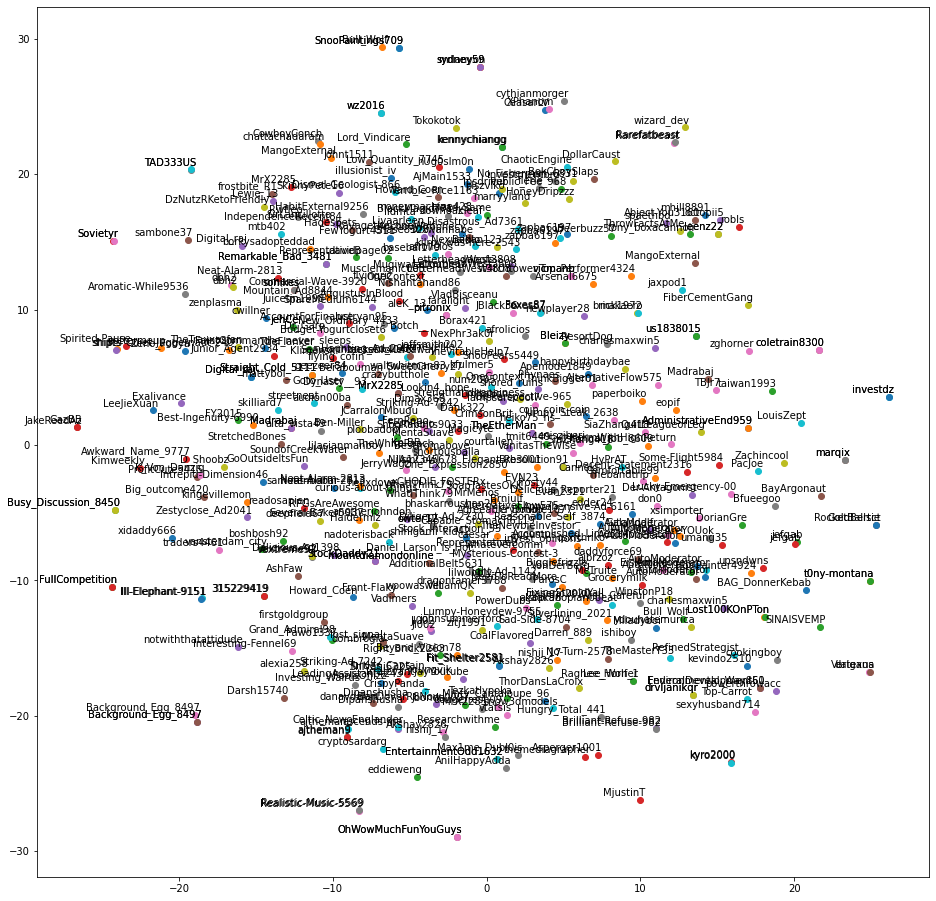

In [21]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(embeddings[0:500])

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:500])):
    plt.scatter(x[i],y[i])
    plt.annotate(author_list[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()